# Tensorflow Linear models

Tensorflow implementations from scratch using numpy and tensorflow libraries - AlberErre (Author)


## 1) Simple linear model using random numerical data (linear_nn.py)

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Real variables of the model and Dataset (just 2D numerical data created randomly)

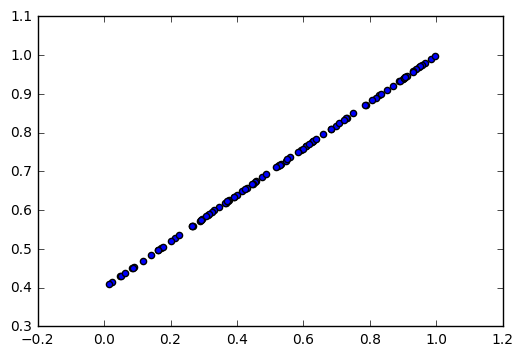

In [49]:
_realWeights =  0.6
_realBiases =   0.4
x_data = np.random.rand(100).astype(np.float32) # Random x values
y_data = _realWeights*x_data + _realBiases # Y values following a linear structure

plt.scatter(x_data,y_data)
plt.show()

The main goal is use this Neural Network to estimate the real values that fit this model (_realWeights and _realBiases) using the model variables (_modelWeights and _modelBiases).

In [50]:
_modelWeights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
_modelBiases = tf.Variable(tf.zeros([1]))

### Linear model: 

In [51]:
Predicted_y = _modelWeights*x_data + _modelBiases

### Training - estimating model's parameters using Gradient Descent (minimization)

In [52]:
## Calculate de square error between predicted and real "y" values
Loss_error = tf.reduce_mean(tf.square(Predicted_y - y_data))

## Training: update variables using gradient descent and minimize Loss_error
optimizer = tf.train.GradientDescentOptimizer(0.5)
trainModel = optimizer.minimize(Loss_error)

### Initializing variables and Running the model

In [53]:
## Run the model and init
init = tf.initialize_all_variables()#, no longer available after 2017-03-02. 
#init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

### Increasing accuracy every n_step

Once the variables are inizialized, the session upgrade these variables minimizing the error until convergence. Thus, this code will plot the variables results every 15 n_steps (batch = 15).

Both values, "_modelWeights" and "_modelBiases" approximate to real values in each iteration. In other words, they converge to "_realWeights" and "_realBiases" respectively. 

In [54]:
# Increasing Range will increase the accuracy of the model
for step in range(116):
    sess.run(trainModel)
    if step % 15 == 0: # Batch: 15, plot results every 15 observations
        print("Observation:", step, 
              "Model Weights", sess.run(_modelWeights),
              "Model Biases:", sess.run(_modelBiases),
              "Real Weights:", _realWeights, 
              "Real Biases:", _realBiases)

Observation: 0 Model Weights [ 0.09468579] Model Biases: [ 0.99505424] Real Weights: 0.6 Real Biases: 0.4
Observation: 15 Model Weights [ 0.34821838] Model Biases: [ 0.54219049] Real Weights: 0.6 Real Biases: 0.4
Observation: 30 Model Weights [ 0.50062311] Model Biases: [ 0.45612186] Real Weights: 0.6 Real Biases: 0.4
Observation: 45 Model Weights [ 0.56077653] Model Biases: [ 0.422151] Real Weights: 0.6 Real Biases: 0.4
Observation: 60 Model Weights [ 0.58451873] Model Biases: [ 0.40874287] Real Weights: 0.6 Real Biases: 0.4
Observation: 75 Model Weights [ 0.59388959] Model Biases: [ 0.40345079] Real Weights: 0.6 Real Biases: 0.4
Observation: 90 Model Weights [ 0.5975883] Model Biases: [ 0.401362] Real Weights: 0.6 Real Biases: 0.4
Observation: 105 Model Weights [ 0.59904814] Model Biases: [ 0.40053758] Real Weights: 0.6 Real Biases: 0.4


## 1) Results: 

#### This will provide a clear image of how the _modelWeights and _modelBiases values converge until the _realWeights and _realBiases. Which are, in essence, the true values that represent the data and, therefore, the best optimal solution to this problem.

## 2) Simple linear model using noisy data

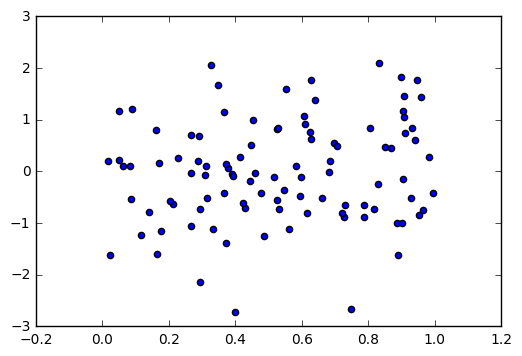

In [55]:
y_data_noisy = np.random.randn(100).astype(np.float32) # Y random values

plt.scatter(x_data,y_data_noisy)
plt.show()



### Create new functions to use this noisy data

In [56]:
Loss_error_noisy = tf.reduce_mean(tf.square(Predicted_y - y_data_noisy))
optimizer = tf.train.GradientDescentOptimizer(0.5)
trainModel_noisy = optimizer.minimize(Loss_error_noisy)


In [57]:
## Run the model and init
init = tf.initialize_all_variables()#, no longer available after 2017-03-02. 
#init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

In [58]:
# Increasing Range will increase the accuracy of the model
for step in range(116):
    sess.run(trainModel_noisy)
    if step % 15 == 0: # Batch: 15, plot results every 15 observations
        print("Observation:", step, 
              "Model Weights", sess.run(_modelWeights),
              "Model Biases:", sess.run(_modelBiases),
              "Real Weights:", _realWeights, 
              "Real Biases:", _realBiases)

Observation: 0 Model Weights [-0.56382251] Model Biases: [ 0.48625118] Real Weights: 0.6 Real Biases: 0.4
Observation: 15 Model Weights [ 0.07318637] Model Biases: [-0.03420779] Real Weights: 0.6 Real Biases: 0.4
Observation: 30 Model Weights [ 0.35177162] Model Biases: [-0.19153523] Real Weights: 0.6 Real Biases: 0.4
Observation: 45 Model Weights [ 0.46172783] Model Biases: [-0.25363162] Real Weights: 0.6 Real Biases: 0.4
Observation: 60 Model Weights [ 0.50512695] Model Biases: [-0.27814072] Real Weights: 0.6 Real Biases: 0.4
Observation: 75 Model Weights [ 0.52225637] Model Biases: [-0.28781435] Real Weights: 0.6 Real Biases: 0.4
Observation: 90 Model Weights [ 0.52901727] Model Biases: [-0.29163247] Real Weights: 0.6 Real Biases: 0.4
Observation: 105 Model Weights [ 0.53168577] Model Biases: [-0.29313949] Real Weights: 0.6 Real Biases: 0.4
